# Importing Pandas and dataset

In [1]:
import pandas as pd
df=pd.read_csv('../Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


Check for NaN

In [2]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Correlation

<Axes: >

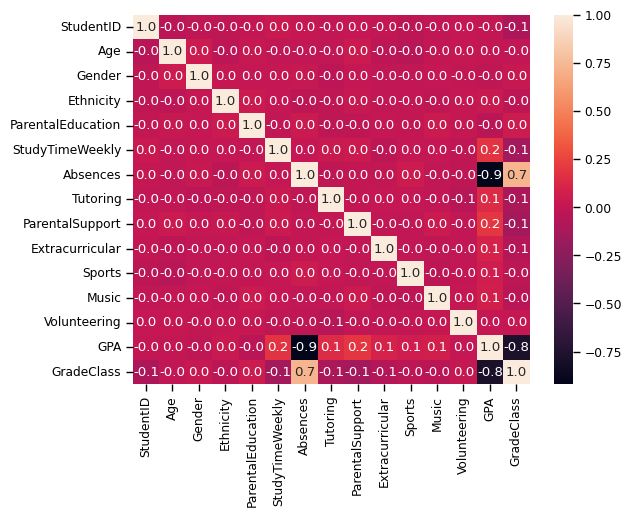

In [3]:
import seaborn
seaborn.set_context("paper", rc={"figure.figsize": (20, 8)})
seaborn.heatmap(data=df.corr(),annot=True,fmt=".1f")

## Assign Inputs and Targets

In [4]:
x=df.drop(columns={'GPA','GradeClass'})
y=df['GPA']

## train_test_split

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
c=lr.intercept_
print("bias",c)

m=lr.coef_
print("weights",m)


bias 2.5827024997626635
weights [ 1.60470407e-05 -6.50738312e-03  8.89285646e-03  4.00944546e-03
  5.07442178e-04  2.90924274e-02 -9.94762601e-02  2.58097333e-01
  1.48592683e-01  1.90412772e-01  1.76707970e-01  1.53076186e-01
 -4.78580025e-04]


## Predict with train , to check training loss

In [6]:
y_pred_train=lr.predict(X_train)
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MSE=mean_squared_error(y_train,y_pred_train)
RMSE=sqrt(MSE)
CoV=RMSE/(y_pred_train.mean())
print("MAE:",mean_absolute_error(y_train,y_pred_train))
print("MSE",MSE)
print("R^2:",r2_score(y_train,y_pred_train))
print("RMSE",RMSE)
print("CoV:",CoV)

MAE: 0.16006529667279565
MSE 0.03898214219090881
R^2: 0.9533094110387231
RMSE 0.19743895813873413
CoV: 0.1039632008171673


## Predict with test and check test losses

In [7]:
yhat=lr.predict(X_test)

In [8]:
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MSE=mean_squared_error(yhat,y_test)
RMSE=sqrt(MSE)
CoV=RMSE/(yhat.mean())
print("MAE:",mean_absolute_error(yhat,y_test))
print("MSE",MSE)
print("R^2:",r2_score(yhat,y_test))
print("RMSE",RMSE)
print("CoV:",CoV)

MAE: 0.1546612290785245
MSE 0.03745542707222433
R^2: 0.9526079405159057
RMSE 0.19353404628701465
CoV: 0.10046348613465184


# Combining all Predictions and join with 

In [9]:
y_pred_train_df = pd.DataFrame(y_pred_train, columns=['Predicted GPA'])
yhat_df = pd.DataFrame(yhat, columns=['Predicted GPA'])

y_final_prediction = pd.concat([y_pred_train_df, yhat_df], axis=0, ignore_index=True)

if len(y_final_prediction) == len(df):
    final_df=df
    final_df['Predicted GPA'] = y_final_prediction
else:
    print("Error: Length of predictions does not match length of df")

## Adding Grade Class to the GPA predictions and Final Dataframe with correct and Predicted

In [10]:
def categorize_gpa(gpa):
    if gpa < 2:
        return 4
    elif 2 <= gpa < 2.5:
        return 3
    elif 2.5 <= gpa < 3:
        return 2
    elif 3 <= gpa < 3.5:
        return 1
    else:
        return 0

# Apply the function to the Predicted GPA column
final_df['Predicted GradeClass'] = final_df['Predicted GPA'].apply(categorize_gpa)

final_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Predicted GPA,Predicted GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2.582399,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1.253499,4
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1.957066,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1.400861,4
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0.916965,4


## Dataframe for Only correct (only correct rows)

In [11]:
correct_predictions_df = final_df[final_df['GradeClass'] == final_df['Predicted GradeClass']]
correct_predictions_df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Predicted GPA,Predicted GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2.582399,2
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1.957066,4
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0.916965,4
11,1012,17,0,0,1,7.598486,15,0,2,0,0,0,1,1.559595,4.0,1.051559,4
14,1015,18,1,0,1,11.197811,9,1,2,0,0,0,0,2.396788,3.0,2.131538,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,3368,15,1,3,1,9.381207,18,0,3,0,0,1,0,1.454723,1.0,3.083097,1
2370,3371,18,1,2,1,2.912575,25,0,1,0,1,0,1,0.569420,4.0,1.020604,4
2384,3385,15,1,0,1,16.655581,13,1,3,0,1,0,0,2.539113,4.0,1.479650,4
2386,3387,16,0,0,2,13.814021,14,0,2,0,0,0,0,2.000084,4.0,0.943405,4


## Finding number of correct preds

In [12]:
total_rows, num_columns = final_df.shape
total_rows 

2392

In [13]:
correct_rows, num_columns = correct_predictions_df.shape
correct_rows

835

In [14]:
print("Correct Findings  :" , float(correct_rows/total_rows)*100 , "%")

Correct Findings  : 34.908026755852845 %
